In [13]:
import import_ipynb
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
from IPython import display
import main
AUDIO_PATH = 'dataset/FMA/fma_small/'
METADATA_PATH = 'dataset/FMA/fma_metadata/'

In [20]:
from zipfile import ZipFile
zf = ZipFile('fma_metadata.zip', 'r')
zf.extractall('dataset/FMA/fma_metadata/')
zf.close()

661824 22050
(128, 1293) 036096


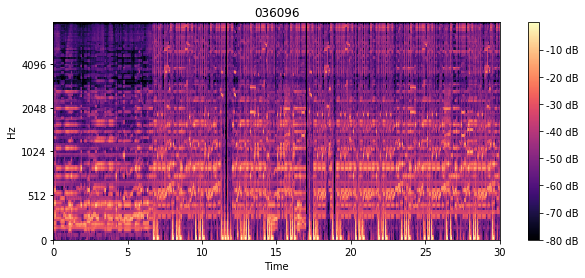

In [21]:
filename = main.get_audio_path(AUDIO_PATH, 36096)
y, sr = librosa.load(filename)
print(len(y),sr)
each_file = filename.split('/')[-1]
genre_name = each_file.split('.')[0]
spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
spect = librosa.power_to_db(spect, ref=np.max)
# spect = np.log(spect)
print(spect.shape, genre_name)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show()

In [30]:
def create_spectogram(track_id, genre):
    filename = main.get_audio_path(AUDIO_PATH, track_id)
    y, sr = librosa.load(filename)
    print(len(y),sr)
    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max)
#     spect = np.log(spect)
    print(spect.shape, genre)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(str(genre))
    plt.show()

In [31]:
# Load genres and metadata
tracks = pd.read_csv(os.path.join(METADATA_PATH, "tracks.csv"), index_col=0, header=[0, 1])
keep_cols = [('set', 'split'), ('set', 'subset'), ('track', 'genre_top')]

df_all = tracks[keep_cols]
df_all = df_all[df_all[('set', 'subset')] == 'small'] # only extract FMA_small metadata
df_all['track_id'] = df_all.index
grouped_df = df_all.groupby(('track', 'genre_top')).first().reset_index()
grouped_df.head(10)

track         set        track_id
       genre_top       split subset         
0     Electronic    training  small     1482
1   Experimental  validation  small      148
2           Folk    training  small      140
3        Hip-Hop    training  small        2
4   Instrumental        test  small    10250
5  International    training  small      666
6            Pop    training  small       10
7           Rock        test  small      182

661248 22050
(128, 646) Electronic


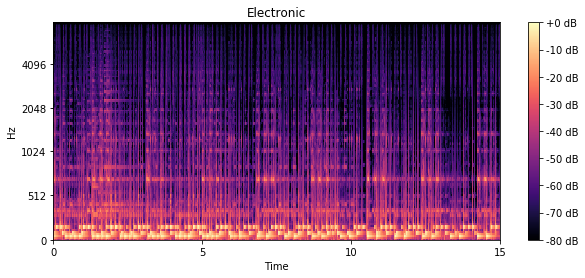

661248 22050
(128, 646) Experimental


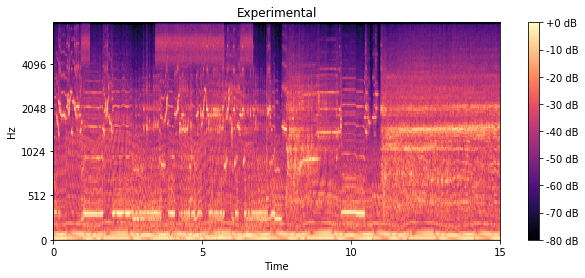

661248 22050
(128, 646) Folk


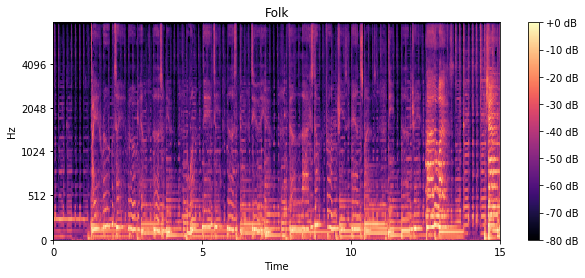

661248 22050
(128, 646) Hip-Hop


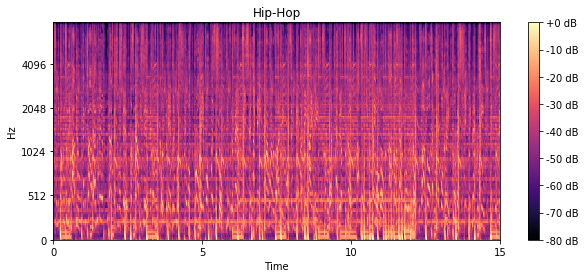

661248 22050
(128, 646) Instrumental


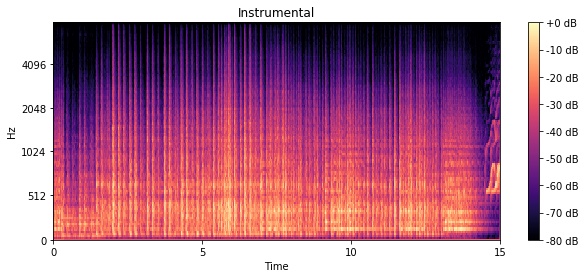

661824 22050
(128, 647) International


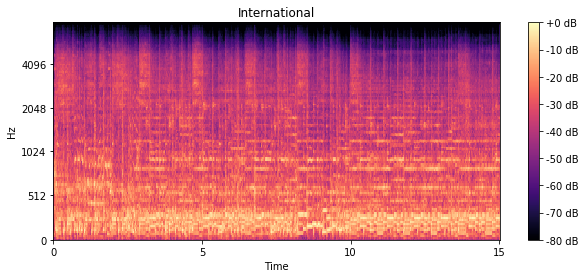

661248 22050
(128, 646) Pop


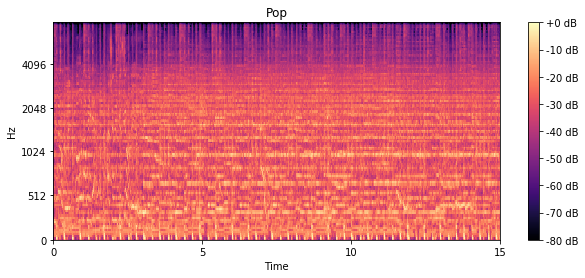

661824 22050
(128, 647) Rock


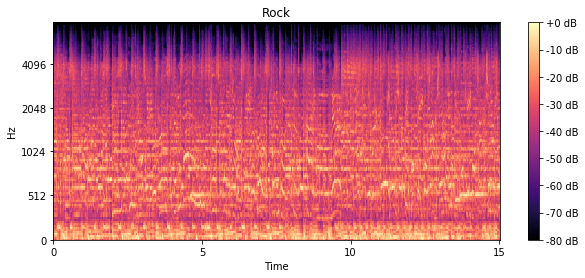

In [32]:
for index, row in grouped_df.iterrows():
    track_id = int(row['track_id'])
    genre = row[('track', 'genre_top')]
    create_spectogram(track_id, genre)